## PHASE-4 PROJECT SUBMSISSION 
### GROUP-$ Members
Name : Edgar Kiprono,Sarah Karanja,Dennis Njogu,Alice Mumbi,Moschini Onyango,Brandon Muraya

Student pace: DS-full time-Online

Submission Date : 12/04/2024

### PROJECT-RECOMMENDATION SYSTEMs

## Introduction

In a world filled with an endless stream of entertainment options, users are often left stranded in a sea of choices, paralyzed by decision overload when it comes to selecting movies. The quest for the perfect film aligned with individual tastes can feel like an elusive endeavor, leaving viewers frustrated and dissatisfied. Recognizing this pressing challenge, there emerges an urgent call for a transformative solution – an intelligent recommendation system poised to navigate the labyrinth of available movies and deliver tailored suggestions that resonate with each user's unique preferences.

Imagine a scenario where users are greeted with a curated list of top-notch movie recommendations, meticulously tailored to their tastes and preferences. Picture the excitement of discovering hidden cinematic gems or exploring new genres that captivate and enthrall. This project embarks on a journey to revolutionize the movie-watching experience, providing users with a personalized roadmap to cinematic bliss. By harnessing the power of cutting-edge technology and sophisticated algorithms, we aim to unlock a world of endless possibilities, enhancing user satisfaction and engagement with streaming platforms. Welcome to the future of movie recommendations – where every click opens the door to a world of cinematic delight.

### Business Understanding
In an era where user engagement and satisfaction are paramount, personalized recommendation systems have become indispensable tools for businesses seeking to thrive in the competitive landscape. At Money-team$ Co., we recognize the transformative potential of these systems to not only meet but exceed user expectations. Imagine a world where every click on our streaming platform is met with a tailored recommendation, guiding users on a journey of cinematic exploration perfectly aligned with their tastes and preferences. With our cutting-edge technology and innovative algorithms, we are poised to redefine the movie-watching experience, making each interaction a seamless blend of excitement and anticipation.

For stakeholders invested in the success of Money-team$ Co., this project signifies more than just a technological endeavor – it represents a commitment to excellence and a dedication to providing unparalleled value to our users. By leveraging personalized movie recommendations, we aim to not only enhance user satisfaction but also drive increased viewer retention, platform usage, and revenue generation. Together, let's embark on this thrilling journey towards creating a recommendation system that sets new standards of excellence in the streaming industry, elevating the user experience to unprecedented heights.


### Problem Statement
To recommend top 5 movies based on customer ratings of other movies to money-team Co$ users 

## Objective

## Data Understanding
### Data source
The project data was outsourced from [grouplens](https://grouplens.org/datasets/movielens/latest/).
The MovieLens dataset serves as the backbone for numerous academic papers and machine learning proofs-of-concept, owing to its rich and diverse nature. However, our endeavor is not merely academic; it's about addressing a real-world business problem within the context of recommending movies. Hence, in addition to crafting an efficient recommendation model.

To accomplish this, we delve into the renowned MovieLens dataset, a cornerstone in the realm of recommendation systems. Developed by the GroupLens research lab at the University of Minnesota, the MovieLens dataset contains a wealth of information, encompassing user ratings for a vast array of movies. While the dataset offers various subsets, we recommend utilizing the "small" dataset, which It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. This subset provides a manageable yet comprehensive dataset to derive meaningful insights and build robust recommendation models.


### Datasets understanding

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read link csv file
data1 = pd.read_csv('Data/links.csv')
#show df shape
print(data1.shape)
#print top5 rows
data1.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
#read movie csv file
data2 = pd.read_csv('Data/movies.csv')
#print column/rows shape
print(data2.shape)
data2.head(5)

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#read ratings csv file
data3 = pd.read_csv('Data/ratings.csv')
#show ratings shape
print(data3.shape)
data3.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
#read tags csc file
data4 = pd.read_csv('Data/tags.csv')
print(data4.shape)
data4.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
def display_missing_values(csv_file):
    # Load CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Check for missing values
    missing_values = df.isna().sum()
    
    # Display missing values
    print("Missing values in", csv_file)
    print(missing_values)

# Example usage:
# Replace 'file_path.csv' with the path to your CSV file
print(display_missing_values('Data/links.csv'))
print(display_missing_values('Data/movies.csv'))
print(display_missing_values('Data/ratings.csv'))
print(display_missing_values('Data/tags.csv'))

Missing values in Data/links.csv
movieId    0
imdbId     0
tmdbId     8
dtype: int64
None
Missing values in Data/movies.csv
movieId    0
title      0
genres     0
dtype: int64
None
Missing values in Data/ratings.csv
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
None
Missing values in Data/tags.csv
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
None


#### Merge files

In [7]:
#merge dataframes using movie ID
#merge links csv and movies csv
result = pd.merge(data1, data2, on='movieId', how='inner')
#merge result with ratings csv
result = pd.merge(result, data3, on='movieId', how='inner')

In [8]:
result.tail()

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
100831,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100834,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021
100835,193609,101726,37891.0,Andrew Dice Clay: Dice Rules (1991),Comedy,331,4.0,1537157606


In [9]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   imdbId     100836 non-null  int64  
 2   tmdbId     100823 non-null  float64
 3   title      100836 non-null  object 
 4   genres     100836 non-null  object 
 5   userId     100836 non-null  int64  
 6   rating     100836 non-null  float64
 7   timestamp  100836 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.2+ MB


In [10]:
#checking for duplicated values
duplicates = result[result.duplicated()]
duplicates

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp


In [11]:
#dropping null values
result.dropna(inplace=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100823 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   imdbId     100823 non-null  int64  
 2   tmdbId     100823 non-null  float64
 3   title      100823 non-null  object 
 4   genres     100823 non-null  object 
 5   userId     100823 non-null  int64  
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


In [12]:
#checking for max and min rating
print("Maximum rating: ",result["rating"].max())
print("Minimum rating: ",result["rating"].min())

Maximum rating:  5.0
Minimum rating:  0.5


In [13]:
result["rating"].value_counts()

rating
4.0    26816
3.0    20044
5.0    13209
3.5    13134
4.5     8551
2.0     7550
2.5     5550
1.0     2811
1.5     1791
0.5     1367
Name: count, dtype: int64

In [14]:
#top ten movie titles
title_count = result["title"].value_counts()
title_count.head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

In [15]:
#top 10 movie genres
genre_counts = result["genres"].value_counts().head(10)
genre_counts

genres
Comedy                       7194
Drama                        6290
Comedy|Romance               3967
Comedy|Drama|Romance         3000
Comedy|Drama                 2851
Drama|Romance                2838
Action|Adventure|Sci-Fi      2361
Crime|Drama                  2315
Action|Crime|Thriller        1554
Action|Adventure|Thriller    1455
Name: count, dtype: int64

### Visualizations

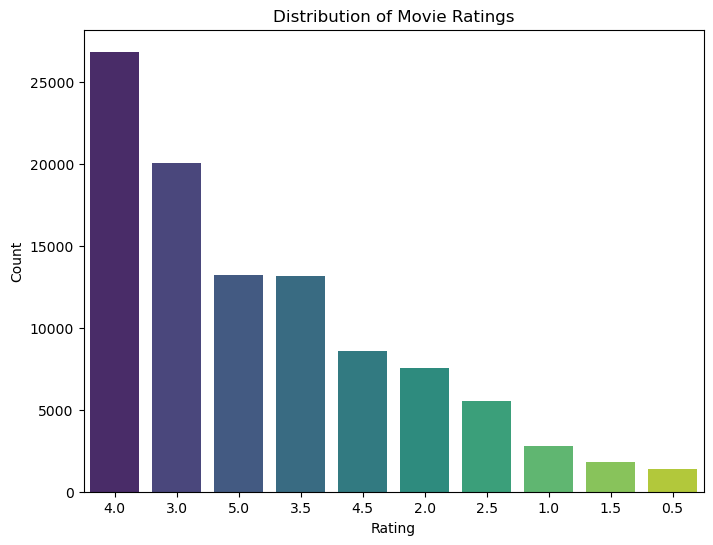

In [16]:
# Get the count of each rating
rating_counts = result['rating'].value_counts()

# Extract the ratings and sort them by count in ascending order
ratings_ordered_by_count = rating_counts.index.tolist()

plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=result, order=ratings_ordered_by_count, palette='viridis')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()

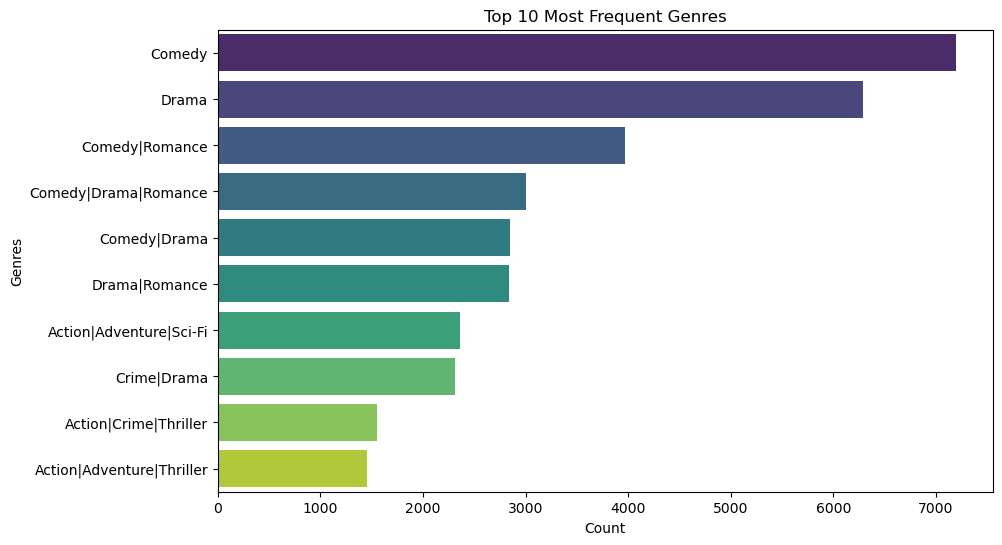

In [17]:
# top 10 most frequent genres
genre_counts = result["genres"].value_counts().head(10)

# Plot the count of top 10 genres with genres on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Genres")
plt.title("Top 10 Most Frequent Genres")
plt.show()


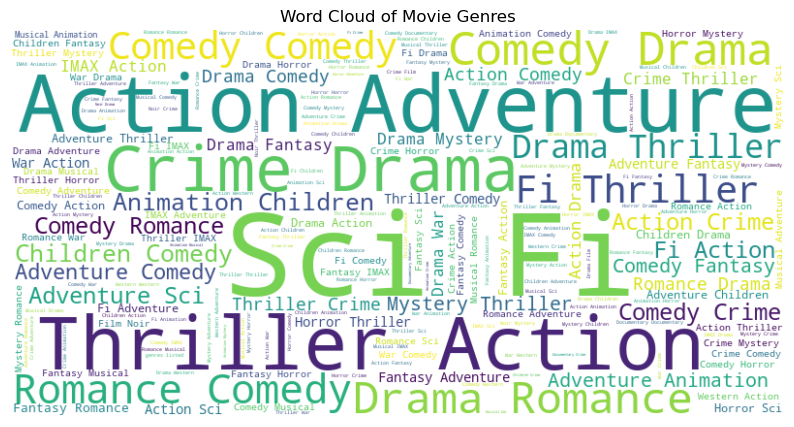

In [18]:
from wordcloud import WordCloud
# Combine all genres into a single string
genres_text = ' '.join(result['genres'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Genres')
plt.axis('off')  # Hide axis
plt.show()


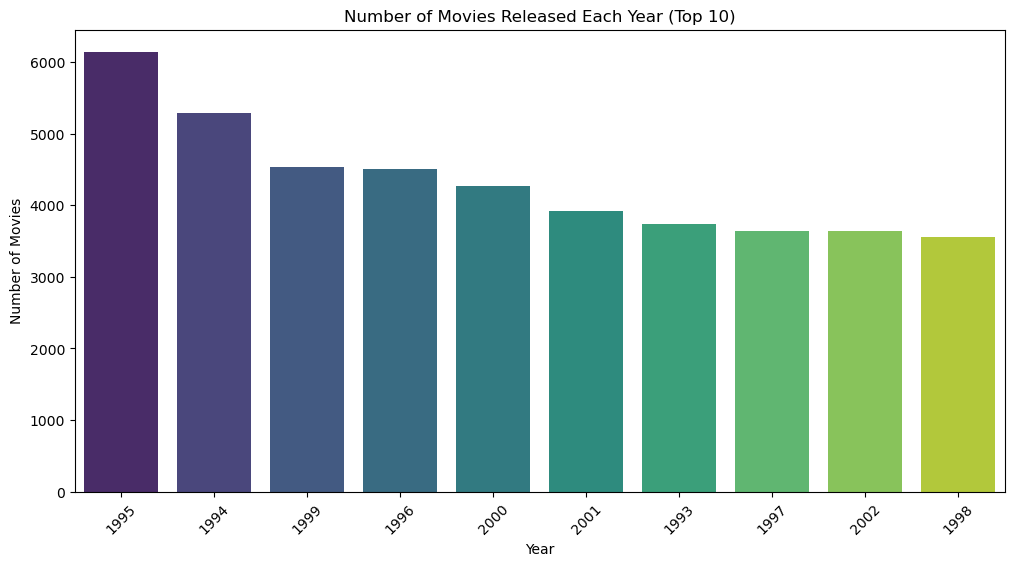

In [19]:
# Extract the year from the title using regular expressions
result['year'] = result['title'].str.extract(r'\((\d{4})\)')

# top 10 years with the highest counts of movies
top_10_years = result['year'].value_counts().head(10)

# Plot the number of movies released in each of the top 10 years
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_years.index, y=top_10_years.values, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year (Top 10)')
plt.xticks(rotation=45)
plt.show()


In [20]:
#top 10 user ratings counts
user_rating = result["userId"].value_counts()
user_rating

userId
414    2698
599    2478
474    2108
448    1863
274    1346
       ... 
53       20
207      20
431      20
442      20
189      20
Name: count, Length: 610, dtype: int64

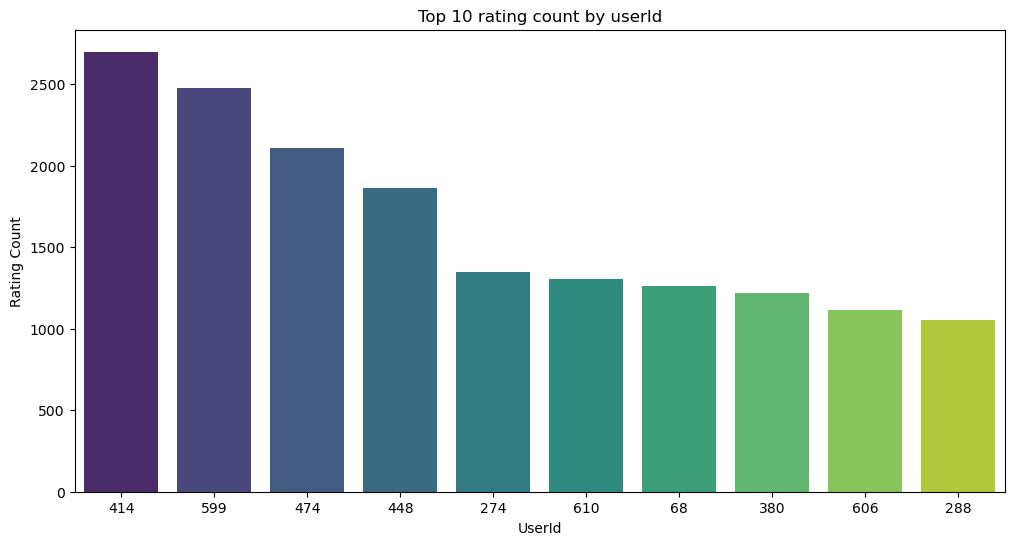

In [21]:
#top 10 userId ratings count
user_rating = result["userId"].value_counts().head(10)
user_ratings = user_rating.sort_values(ascending=False)  # Sort in ascending order

#Convert the index to strings to prioritize the order based on count values
user_ratings.index = user_ratings.index.astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x=user_ratings.index, y=user_ratings.values, palette='viridis')

plt.xlabel('UserId')
plt.ylabel('Rating Count')
plt.title('Top 10 rating count by userId')
plt.xticks()
plt.show()

UserId 414

In [22]:
#Convert timestamp to datetime format with correct unit (seconds since the epoch)
result['timesatmp'] = pd.to_datetime(result['timestamp'], unit='s')
result["timesatmp"]

0        2000-07-30 18:45:03
1        1996-11-08 06:36:02
2        2005-01-25 06:52:26
3        2017-11-13 12:59:30
4        2011-05-18 05:28:03
                 ...        
100831   2018-09-16 14:44:42
100832   2018-09-16 14:52:25
100833   2018-09-16 14:56:45
100834   2018-09-16 15:00:21
100835   2018-09-17 04:13:26
Name: timesatmp, Length: 100823, dtype: datetime64[ns]

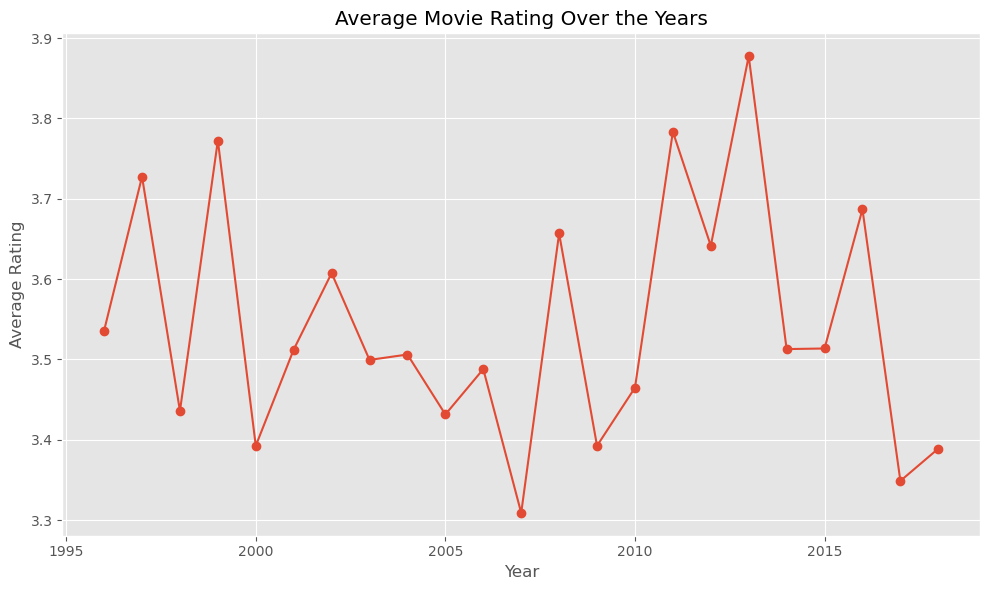

In [34]:
#Extract the year from the datetime column
result['year'] = result['timesatmp'].dt.year

#Aggregate ratings by year
ratings_by_year = result.groupby('year')['rating'].mean()
plt.style.use("ggplot")
#Plot the time series
plt.figure(figsize=(10, 6))
ratings_by_year.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

#Split the data into features (X) and target variable (y)
X =  result[['userId', 'movieId', 'year']]  # Features: userId, movieId, year
y = result['rating']  # Target variable: rating

#Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (80658, 3) (80658,)
Testing set shape: (20165, 3) (20165,)


In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Collaborative filtering: Calculate user-item matrix
user_item_matrix = result.pivot_table(index='userId', columns='movieId', values='rating')

# Content-based filtering: Calculate item-item similarity matrix based on movie genres
tfidf_vectorizer = TfidfVectorizer()
item_genre_matrix = result.groupby('movieId')['genres'].apply(lambda x: ' '.join(x)).reset_index()
tfidf_matrix = tfidf_vectorizer.fit_transform(item_genre_matrix['genres'])
item_item_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Normalize the item-item similarity matrix
scaler = MinMaxScaler()
item_item_similarity_normalized = scaler.fit_transform(item_item_similarity)

# Combine collaborative and content-based recommendations
def hybrid_recommendation(user_id, movie_id):
    # Collaborative filtering: Get top N similar users
    similar_users = user_item_matrix.loc[user_id].dropna().index
    # Content-based filtering: Get top N similar items based on item-item similarity
    similar_items = item_item_similarity_normalized[movie_id - 1].argsort()[-N:][::-1]
    
    # Combine recommendations from both approaches
    hybrid_recommendations = set(similar_users) | set(similar_items)
    
    return hybrid_recommendations

# Example usage: Get hybrid recommendations for user_id and movie_id
user_id = 1
movie_id = 1
N = 2  # Number of recommendations

recommendations = hybrid_recommendation(user_id, movie_id)
print(recommendations)


{1024, 1, 1025, 3, 2048, 1029, 6, 1030, 1031, 1032, 2054, 2058, 2571, 0, 527, 1552, 1042, 2580, 1049, 2078, 543, 3617, 1060, 1573, 2596, 552, 553, 2090, 1580, 2093, 2094, 47, 2096, 1073, 50, 1587, 2099, 3639, 1080, 2105, 2616, 2617, 1089, 1090, 2115, 1092, 2116, 70, 2628, 1097, 3147, 590, 592, 593, 1617, 2640, 596, 1620, 2641, 2644, 2648, 1625, 2137, 2139, 3671, 2141, 2654, 2143, 608, 2657, 3168, 101, 1127, 3176, 1644, 110, 1136, 2161, 3702, 3703, 2174, 2692, 648, 1676, 2700, 2193, 3729, 661, 151, 2716, 157, 3740, 3744, 673, 163, 3243, 1196, 1197, 1198, 3247, 3253, 1206, 1208, 1210, 1213, 1214, 1219, 1220, 1732, 1222, 1224, 2761, 1226, 3273, 2253, 3793, 216, 1240, 2268, 733, 223, 736, 2273, 3809, 231, 1256, 1258, 235, 2797, 1265, 1777, 2291, 1270, 1275, 1278, 1793, 1282, 260, 8193, 2826, 1291, 780, 1804, 1805, 1298, 2329, 2338, 804, 296, 2858, 2353, 2872, 3386, 316, 2366, 1348, 333, 2387, 2899, 2389, 2395, 349, 1377, 356, 2916, 2406, 362, 2414, 367, 3439, 3440, 3441, 1396, 3448, 3450, 

In [26]:
# Define a dictionary to map movie IDs to titles
movie_id_to_title = result.set_index('movieId')['title'].to_dict()

def hybrid_recommendation(user_id, movie_id, N=5):
    # Collaborative filtering: Get top N similar users
    similar_users = user_item_matrix.loc[user_id].dropna().index
    
    # Content-based filtering: Get top N similar items based on item-item similarity
    similar_items = item_item_similarity_normalized[movie_id - 1].argsort()[-N:][::-1]
    
    # Combine recommendations from both approaches
    hybrid_recommendations = list(set(similar_users) | set(similar_items))
    
    # Exclude the input movie from recommendations
    hybrid_recommendations = [m_id for m_id in hybrid_recommendations if m_id != movie_id]
    
    # Map movie IDs to titles
    recommended_movies = [(m_id, movie_id_to_title.get(m_id, "Unknown")) for m_id in hybrid_recommendations]
    
    return recommended_movies[:N]

# Example usage: Get hybrid recommendations for user_id and movie_id
user_id = 1
movie_id = 1
N = 5  # Number of recommendations

recommendations = hybrid_recommendation(user_id, movie_id, N)
print("Hybrid Recommendations:")
for movie_id, title in recommendations:
    print(f"Movie ID: {movie_id}, Title: {title}")


Hybrid Recommendations:
Movie ID: 1024, Title: Three Caballeros, The (1945)
Movie ID: 1025, Title: Sword in the Stone, The (1963)
Movie ID: 3, Title: Grumpier Old Men (1995)
Movie ID: 2048, Title: Great Mouse Detective, The (1986)
Movie ID: 1029, Title: Dumbo (1941)


### Cosine Similarity

Cosine Similarity: Determines how vectors are related to each other by measuring the cosine angle between two vectors. The value also ranges from [-1, 1], with -1 meaning that the two vectors are diametrically opposed, 0 meaning the two vectors are perpendicular to one another, and 1 meaning that the vectors are the same.

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Content-based filtering: Calculate item-item similarity matrix based on movie genres
tfidf_vectorizer = TfidfVectorizer()
item_genre_matrix = result.groupby('movieId')['genres'].apply(lambda x: ' '.join(x)).reset_index()
tfidf_matrix = tfidf_vectorizer.fit_transform(item_genre_matrix['genres'])
item_item_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Normalize the item-item similarity matrix
scaler = MinMaxScaler()
item_item_similarity_normalized = scaler.fit_transform(item_item_similarity)

# Define a dictionary to map movie IDs to titles
movie_id_to_title = result.set_index('movieId')['title'].to_dict()

def item_based_recommendation(movie_id, N=5):
    # Get top N similar items based on item-item similarity
    similar_items = item_item_similarity_normalized[movie_id - 1].argsort()[-N-1:-1][::-1]  # Exclude the movie itself
    
    # Map movie IDs to titles
    recommended_movies = [(m_id, movie_id_to_title.get(m_id, "Unknown")) for m_id in similar_items]
    
    return recommended_movies

# Example usage: Get item-based recommendations for a given movie
movie_id = 1
N = 5  # Number of recommendations

recommendations = item_based_recommendation(movie_id, N)
print("Item-Based Recommendations:")
for movie_id, title in recommendations:
    print(f"Movie ID: {movie_id}, Title: {title}")


Item-Based Recommendations:
Movie ID: 8193, Title: Unknown
Movie ID: 6170, Title: Black Stallion, The (1979)
Movie ID: 8901, Title: Unknown
Movie ID: 7734, Title: Unknown
Movie ID: 6462, Title: Unknown


In [28]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# Collaborative filtering: Calculate user-user similarity matrix
user_item_matrix = result.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)
user_user_similarity = cosine_similarity(user_item_matrix)

# Define a dictionary to map movie IDs to titles
movie_id_to_title = result.set_index('movieId')['title'].to_dict()

def user_based_recommendation(user_id, N=5):
    # Get top N similar users
    similar_users = user_user_similarity[user_id - 1].argsort()[-N-1:-1][::-1]  # Exclude the user itself
    
    # Get movies rated by similar users but not by the target user
    movies_rated_by_similar_users = user_item_matrix.iloc[similar_users].values
    movies_not_rated_by_target_user = (movies_rated_by_similar_users == 0) & (user_item_matrix.loc[user_id] != 0).values
    movies_to_recommend = np.where(movies_not_rated_by_target_user)[1]
    
    # Map movie IDs to titles
    recommended_movies = [(m_id, movie_id_to_title.get(m_id, "Unknown")) for m_id in movies_to_recommend]
    
    return recommended_movies[:N]

# Example usage: Get user-based recommendations for a given user
user_id = 1
N = 5  # Number of recommendations

recommendations = user_based_recommendation(user_id, N)
print("User-Based Recommendations:")
for movie_id, title in recommendations:
    print(f"Movie ID: {movie_id}, Title: {title}")


User-Based Recommendations:
Movie ID: 2, Title: Jumanji (1995)
Movie ID: 43, Title: Restoration (1995)
Movie ID: 62, Title: Mr. Holland's Opus (1995)
Movie ID: 89, Title: Nick of Time (1995)
Movie ID: 124, Title: Unknown
